# IMDB Reviews With Weight Regularization
## Classify as positive or negative (binary classification problem)
## Modified to compare default model with one using L2 Weight Regularization

In [1]:
from keras.datasets import imdb
import numpy as np #numpy-1.16.1 for imdb.load_data() keras support: default np_load(allow_Pickle=True) 

Using TensorFlow backend.


# Load and Prepare Data

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) #10000 most frequent

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

In [5]:
max([max(sequence) for sequence in train_data]) #max frequency is 10000, list comprehension

9999

In [6]:
#decode review
word_index = imdb.get_word_index() #name -> code
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) #reverse keys & vals
decoded_review = ''.join([reverse_word_index.get(i-3, '?') for i in train_data[0]]) 
    #offset by 3 because 0, 1, 2 -> "padding", "start of sequence", "unknown"

In [7]:
# one-hot encode each index of x, x.shape = (numSamples, 10000)
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, thisSequence in enumerate(sequences): #enumerate gives (index, sequences)
        results[i, thisSequence] = 1.
    return results

In [8]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [10]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# Layers and Weight Regularizer
Add L2 weight regularization

In [11]:
from keras import models
from keras import layers
from keras import regularizers

In [12]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [13]:
modelReg = models.Sequential()
modelReg.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                       activation='relu', input_shape=(10000,)))
modelReg.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                       activation='relu'))
#l2(.001): every coefficient in weight matrix of layer will add .001 * weight_coefficient_value to total loss
modelReg.add(layers.Dense(1, activation='sigmoid'))

# Loss Function and Optimizer

In [14]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [15]:
modelReg.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

# Partition Validation Data

In [16]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Train Models

In [17]:
history = model.fit(partial_x_train,
                   partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 138us/step - loss: 0.5080 - acc: 0.7849 - val_loss: 0.3746 - val_acc: 0.8729
Epoch 2/20
15000/15000 [==============================] - 1s 81us/step - loss: 0.3007 - acc: 0.9020 - val_loss: 0.3248 - val_acc: 0.8679
Epoch 3/20
15000/15000 [==============================] - 1s 81us/step - loss: 0.2195 - acc: 0.9277 - val_loss: 0.2823 - val_acc: 0.8897
Epoch 4/20
15000/15000 [==============================] - 1s 83us/step - loss: 0.1719 - acc: 0.9435 - val_loss: 0.2747 - val_acc: 0.8883
Epoch 5/20
15000/15000 [==============================] - 1s 82us/step - loss: 0.1405 - acc: 0.9552 - val_loss: 0.3129 - val_acc: 0.8778
Epoch 6/20
15000/15000 [==============================] - 1s 82us/step - loss: 0.1129 - acc: 0.9653 - val_loss: 0.2989 - val_acc: 0.8852
Epoch 7/20
15000/15000 [==============================] - 1s 83us/step - loss: 0.0965 - acc: 0.9697 - val_loss: 0.3164 - val_a

In [18]:
historyReg = modelReg.fit(partial_x_train,
                   partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 86us/step - loss: 0.5676 - acc: 0.7866 - val_loss: 0.4389 - val_acc: 0.8662
Epoch 2/20
15000/15000 [==============================] - 1s 76us/step - loss: 0.3622 - acc: 0.8987 - val_loss: 0.3705 - val_acc: 0.8730
Epoch 3/20
15000/15000 [==============================] - 1s 83us/step - loss: 0.2915 - acc: 0.9205 - val_loss: 0.3332 - val_acc: 0.8896
Epoch 4/20
15000/15000 [==============================] - 1s 77us/step - loss: 0.2541 - acc: 0.9341 - val_loss: 0.3366 - val_acc: 0.8859
Epoch 5/20
15000/15000 [==============================] - 1s 81us/step - loss: 0.2305 - acc: 0.9423 - val_loss: 0.3273 - val_acc: 0.8893
Epoch 6/20
15000/15000 [==============================] - 1s 80us/step - loss: 0.2153 - acc: 0.9461 - val_loss: 0.3330 - val_acc: 0.8868
Epoch 7/20
15000/15000 [==============================] - 1s 72us/step - loss: 0.2010 - acc: 0.9551 - val_loss: 0.3600 - val_acc

# Results

In [19]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [20]:
history.history.get('val_loss')

[0.37458974194526673,
 0.32476669516563417,
 0.2823147870540619,
 0.2747361021518707,
 0.3128834726333618,
 0.29885508346557615,
 0.31635591678619385,
 0.33908946967124937,
 0.3588301465511322,
 0.43451569867134093,
 0.45571499509811403,
 0.4521837179660797,
 0.4874344349384308,
 0.515261798286438,
 0.5504888805866242,
 0.584066519165039,
 0.6130999487876893,
 0.7674055177688599,
 0.6752867017745972,
 0.7051967536926269]

In [21]:
historyReg.history.get('val_loss')

[0.43891915030479434,
 0.3705348699569702,
 0.3331894399166107,
 0.33660898594856264,
 0.3273495102405548,
 0.3330442698478699,
 0.36003671865463255,
 0.3577519730091095,
 0.3812510458946228,
 0.3737196223258972,
 0.4177617740631103,
 0.39582779688835146,
 0.47628958983421327,
 0.4130021577358246,
 0.42111313886642454,
 0.4331812798023224,
 0.4188109968185425,
 0.4842497313976288,
 0.4307318428039551,
 0.4468322396755218]

In [22]:
import matplotlib.pyplot as plt

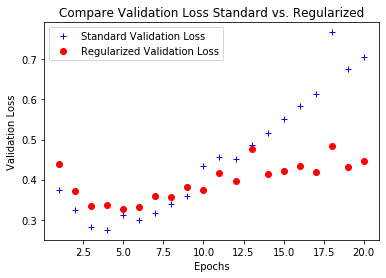

In [23]:
valLoss = history.history.get('val_loss')
valLossReg = historyReg.history.get('val_loss')
epochs = range(1, len(valLoss) + 1)
plt.plot(epochs, valLoss, 'b+', label='Standard Validation Loss')
plt.plot(epochs, valLossReg, 'ro', label='Regularized Validation Loss')
plt.title('Compare Validation Loss Standard vs. Regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

In [24]:
print(model.metrics_names)
print(model.evaluate(x_test, y_test))
print(modelReg.evaluate(x_test, y_test))

['loss', 'acc']
25000/25000 [==============================] - 2s 74us/step
[0.7660266757798195, 0.85192]
25000/25000 [==============================] - 2s 70us/step
[0.47399399439811707, 0.85688]


The regularized model appears to be less accurate, despite having less loss in the test set